# ANALISIS PREFERENSI KONTEN NETFLIX

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Membaca file csv

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nadikuechler/praktikum-sim/main/netflix_titles.csv", encoding='latin1')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8807,s8808,TV Show,Parasyte: The Grey,Yeon Sang-ho,"Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan",South Korea,"April 5, 2024",2024,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Wrangling Data

## Menampilkan informasi

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

## Mengecek jumlah nilai kosong

In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


## Menampilkan jumlah baris duplikat

In [ ]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


## Menghapus kolom unnamed

In [ ]:
cols_to_drop = [f'Unnamed: {i}' for i in range(12, 26)]
df = df.drop(columns=cols_to_drop)

df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8807,s8808,TV Show,Parasyte: The Grey,Yeon Sang-ho,"Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan",South Korea,"April 5, 2024",2024,TV-MA,1 Season,"Sci-fi, Horror, Action",A new breed of parasitic aliens arrive on Eart...


## Menghapus baris dari dataframe yang memiliki nilai kosong

In [ ]:
df.dropna(subset=['director', 'cast', 'country', 'rating', 'duration', 'date_added'], inplace=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis NiewÃ¶hner, Milan Peschel,...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8807,s8808,TV Show,Parasyte: The Grey,Yeon Sang-ho,"Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan",South Korea,"April 5, 2024",2024,TV-MA,1 Season,"Sci-fi, Horror, Action",A new breed of parasitic aliens arrive on Eart...


## Mengganti format waktu

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [ ]:
df['year_added'] = df['date_added'].dt.year
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021.0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis NiewÃ¶hner, Milan Peschel,...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021.0
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019.0
8807,s8808,TV Show,Parasyte: The Grey,Yeon Sang-ho,"Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan",South Korea,2024-04-05,2024,TV-MA,1 Season,"Sci-fi, Horror, Action",A new breed of parasitic aliens arrive on Eart...,2024.0


## Menampilkan jumlah nilai kosong

In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,4
release_year,0
rating,0
duration,0


# Exploratory Data Analysis (EDA)

## Proporsi Movie vs TV Show

In [ ]:
df['type'].value_counts()

,count
type,
Movie,5186
TV Show,148


## Negara asal konten terbanyak

In [ ]:
df['country'].value_counts().head(10)

,count
country,
United States,1847
India,875
United Kingdom,183
Canada,107
Spain,91
Egypt,90
Nigeria,88
Japan,83
Turkey,79


## Genre (listed_in) paling sering muncul

In [ ]:
from collections import Counter

genre_series = df['listed_in'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
all_genres = Counter([genre for sublist in genre_series for genre in sublist])

pd.Series(dict(all_genres)).sort_values(ascending=False).head(10)

,0
International Movies,2369
Dramas,2293
Comedies,1553
Action & Adventure,806
Independent Movies,740
Romantic Movies,579
Thrillers,547
Children & Family Movies,503
Documentaries,391
Horror Movies,336


## Sutradara paling produktif

In [ ]:
df['director'].dropna().value_counts().head(10)

,count
director,
"RaÃºl Campos, Jan Suter",18
Marcus Raboy,15
Jay Karas,14
Cathy Garcia-Molina,13
Youssef Chahine,12
Martin Scorsese,12
Jay Chapman,12
Steven Spielberg,11
Don Michael Paul,10


## Aktor/Aktris paling sering muncul

In [ ]:
cast_series = df['cast'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
all_casts = Counter([actor for sublist in cast_series for actor in sublist])

pd.Series(dict(all_casts)).sort_values(ascending=False).head(10)

,0
Anupam Kher,42
Shah Rukh Khan,34
Naseeruddin Shah,31
Om Puri,30
Akshay Kumar,30
Amitabh Bachchan,28
Paresh Rawal,28
Boman Irani,27
Kareena Kapoor,25
Samuel L. Jackson,21


## Jumlah rilis tiap tahun

In [ ]:
df['release_year'].value_counts().sort_index(ascending=False).head(10)

,count
release_year,
2024,1
2021,161
2020,442
2019,519
2018,648
2017,657
2016,577
2015,349
2014,243


## Konten lama (rilis < 2000) yang baru ditambahkan

In [ ]:
konten_lama = df[(df['release_year'] < 2000) & (df['year_added'].notna())][['title', 'release_year', 'date_added']]
konten_lama.head()

,title,release_year,date_added
7,Sankofa,1993,2021-09-24
24,Jeans,1998,2021-09-21
41,Jaws,1975,2021-09-16
42,Jaws 2,1978,2021-09-16
43,Jaws 3,1983,2021-09-16


# Visualization and Explanatory Analysis

In [ ]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## Berapa banyak Movie dibandingkan TV Show?

In [ ]:
type_counts = df['type'].value_counts()

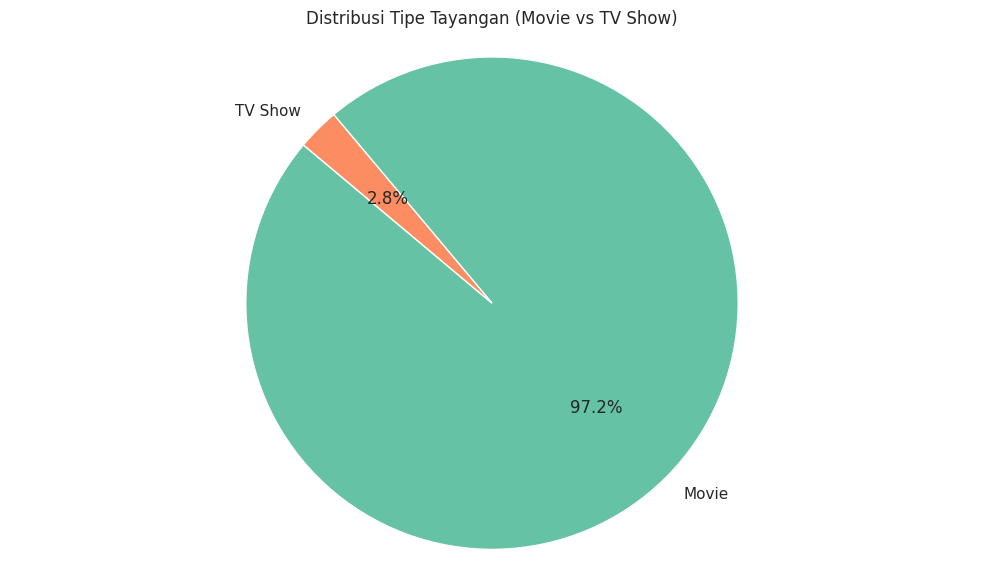

In [ ]:
plt.figure()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Distribusi Tipe Tayangan (Movie vs TV Show)')
plt.axis('equal')
plt.tight_layout()
plt.show()

## Genre apa yang paling sering muncul?

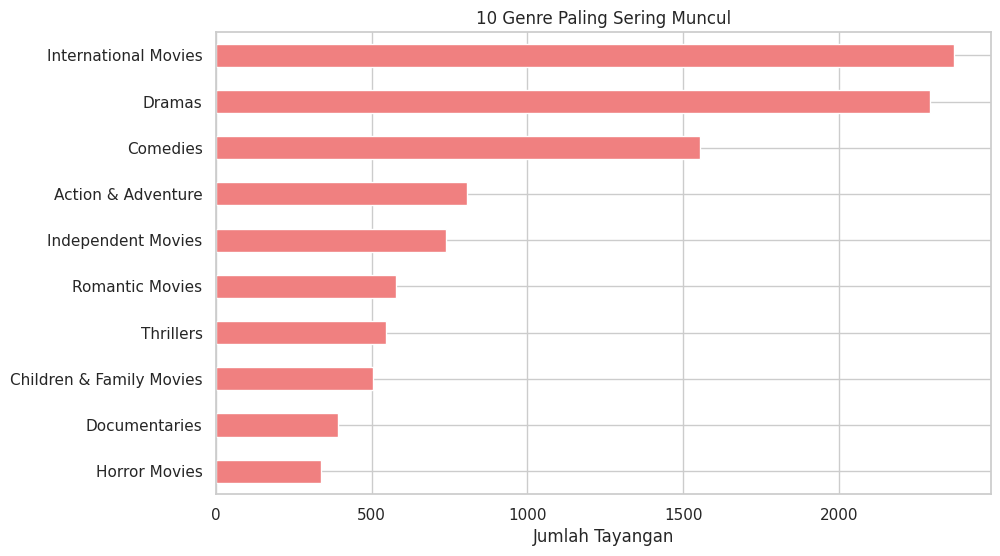

In [ ]:
plt.figure()
pd.Series(dict(all_genres)).sort_values(ascending=False).head(10).plot(kind='barh', color='lightcoral')
plt.title('10 Genre Paling Sering Muncul')
plt.xlabel('Jumlah Tayangan')
plt.gca().invert_yaxis()
plt.show()

## Distribusi negara asal konten

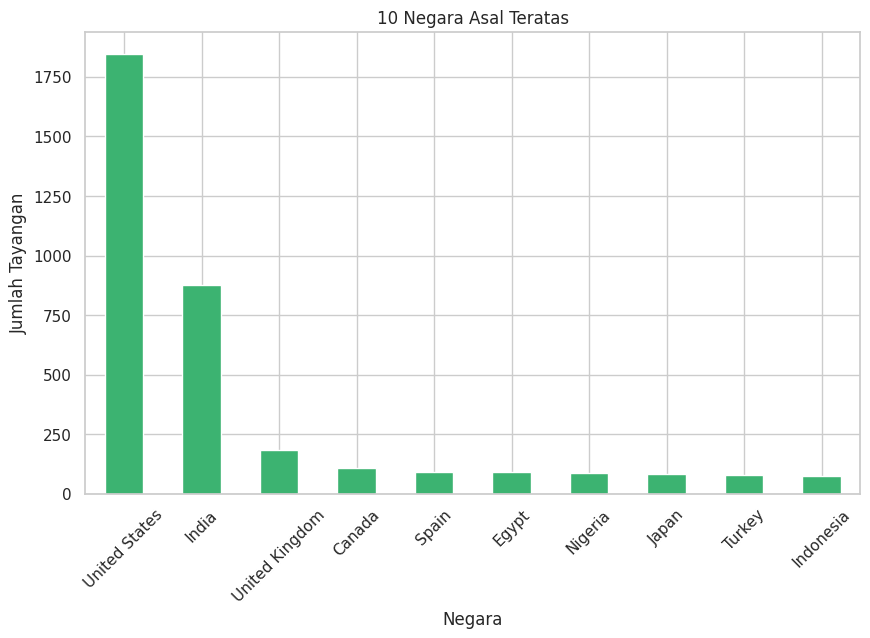

In [ ]:
plt.figure()
df['country'].value_counts().head(10).plot(kind='bar', color='mediumseagreen')
plt.title('10 Negara Asal Teratas')
plt.xlabel('Negara')
plt.ylabel('Jumlah Tayangan')
plt.xticks(rotation=45)
plt.show()

## Top 10 sutradara terproduktif

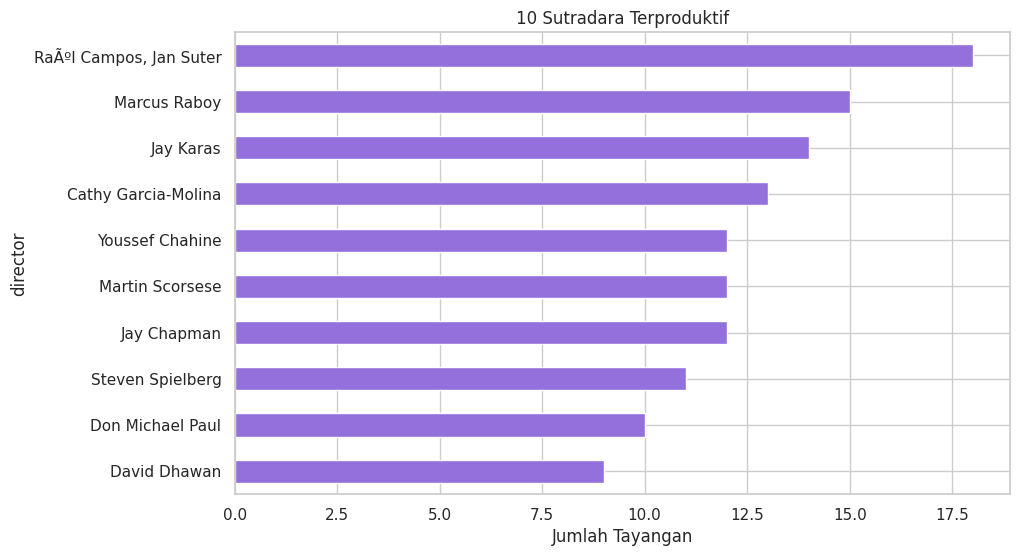

In [ ]:
plt.figure()
df['director'].value_counts().head(10).plot(kind='barh', color='mediumpurple')
plt.title('10 Sutradara Terproduktif')
plt.xlabel('Jumlah Tayangan')
plt.gca().invert_yaxis()
plt.show()

## Top 10 aktor/aktris terproduktif (top 10)

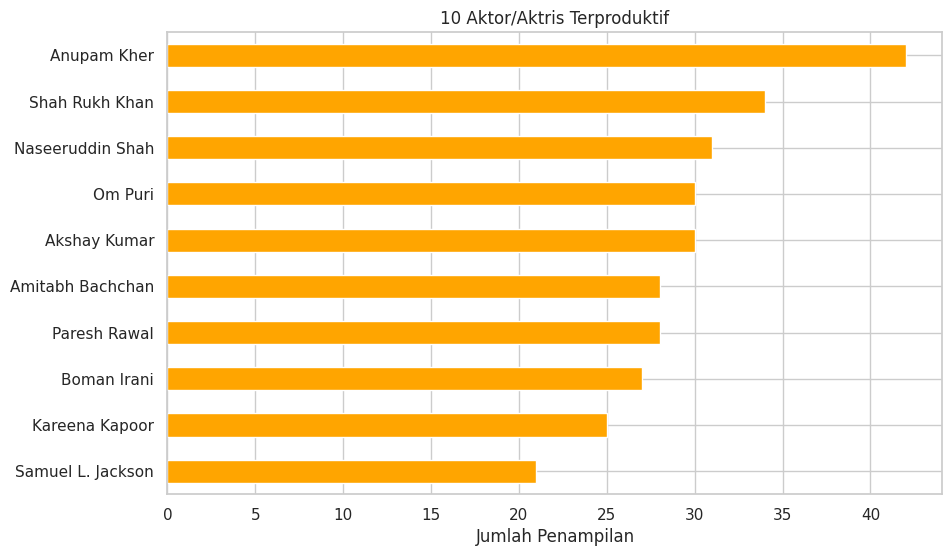

In [ ]:
plt.figure()
pd.Series(dict(all_casts)).sort_values(ascending=False).head(10).plot(kind='barh', color='orange')
plt.title('10 Aktor/Aktris Terproduktif')
plt.xlabel('Jumlah Penampilan')
plt.gca().invert_yaxis()
plt.show()

## Tahun berapakah paling banyak konten rilis?

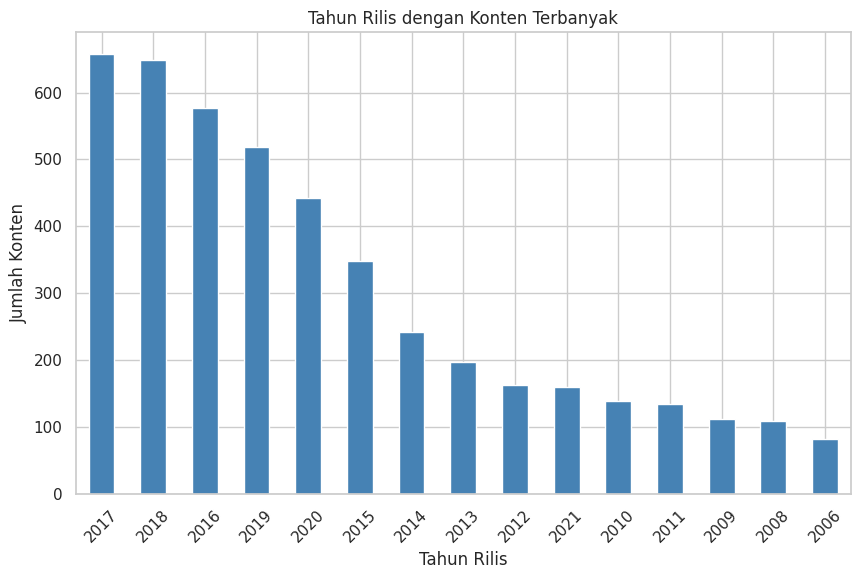

In [ ]:
plt.figure()
df['release_year'].value_counts().sort_values(ascending=False).head(15).plot(kind='bar', color='steelblue')
plt.title('Tahun Rilis dengan Konten Terbanyak')
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah Konten')
plt.xticks(rotation=45)
plt.show()

## Jumlah tayangan berdasarkan tahun rilis dan rating

In [ ]:
heatmap_data = df.pivot_table(index='release_year', columns='rating', aggfunc='size', fill_value=0)

In [ ]:
heatmap_data = heatmap_data[heatmap_data.index >= 2000]

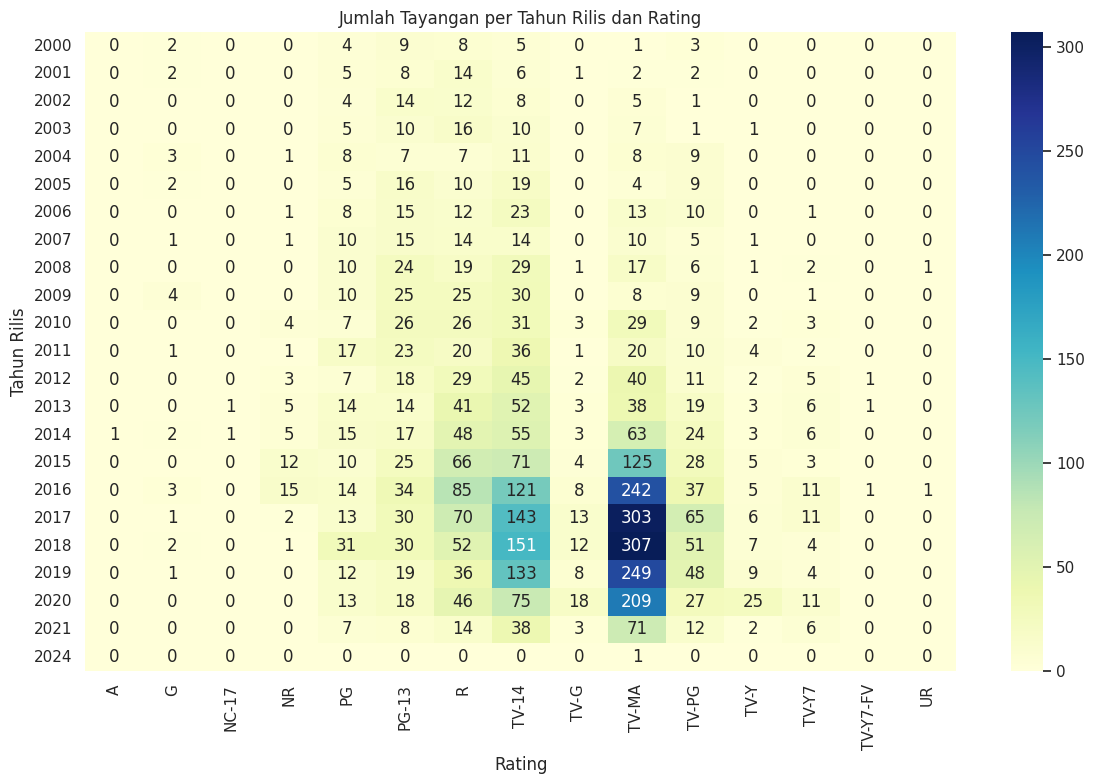

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Jumlah Tayangan per Tahun Rilis dan Rating')
plt.xlabel('Rating')
plt.ylabel('Tahun Rilis')
plt.tight_layout()
plt.show()

## Jumlah Tayangan Ditambahkan ke Netflix per Tahun

In [ ]:
yearly_counts = df['year_added'].dropna().astype(int).value_counts().sort_index()

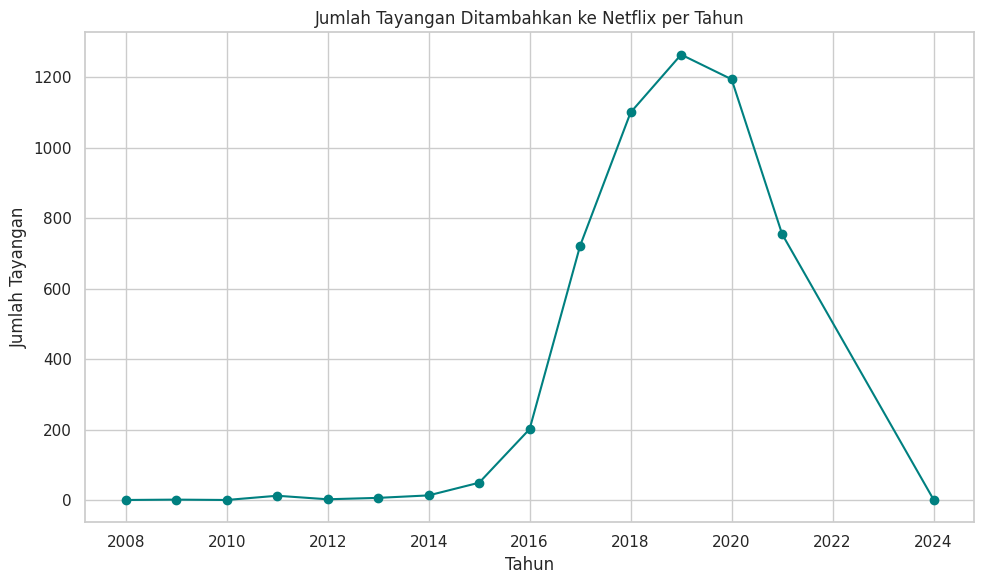

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-', color='teal')
plt.title('Jumlah Tayangan Ditambahkan ke Netflix per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Tayangan')
plt.grid(True)
plt.tight_layout()
plt.show()

## Segmentasi Genre Dominan Berdasarkan Tipe

In [ ]:
df['main_genre'] = df['listed_in'].dropna().apply(lambda x: x.split(',')[0].strip())

In [ ]:
segment3 = df.groupby(['type', 'main_genre']).size().unstack().fillna(0)

In [ ]:
segment3 = segment3.loc[:, segment3.sum().sort_values(ascending=False).head(10).index]

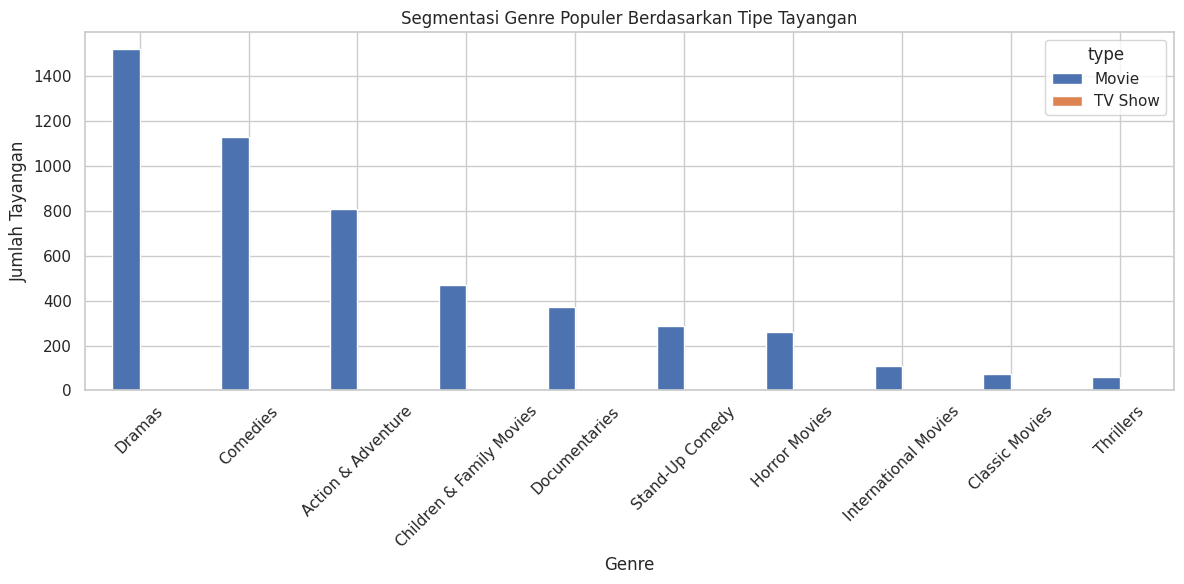

In [ ]:
segment3.T.plot(kind='bar', figsize=(12,6))
plt.title('Segmentasi Genre Populer Berdasarkan Tipe Tayangan')
plt.xlabel('Genre')
plt.ylabel('Jumlah Tayangan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Segmentasi Tahun Rilis dan Tipe

In [ ]:
segment4 = df.groupby(['release_year', 'type']).size().unstack().fillna(0).tail(15)

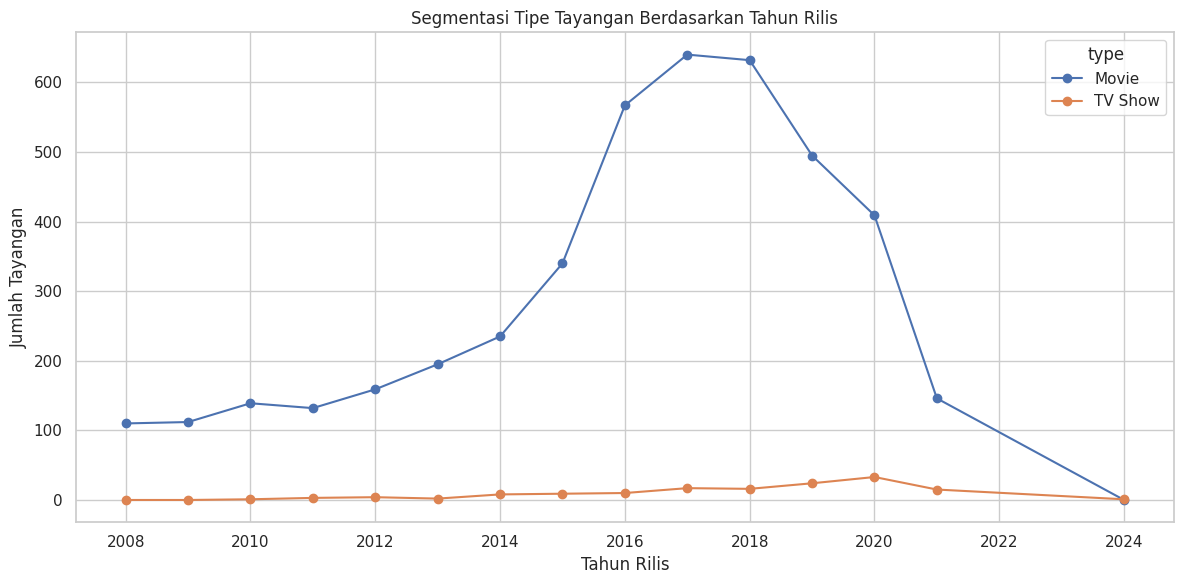

In [ ]:
segment4.plot(kind='line', marker='o', figsize=(12,6))
plt.title('Segmentasi Tipe Tayangan Berdasarkan Tahun Rilis')
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah Tayangan')
plt.grid(True)
plt.tight_layout()
plt.show()

# RFM Analysis

## Negara mana yang paling sering menjadi asal konten yang diunggah ke Netflix?

In [ ]:
recent = df[df['year_added'] >= (df['year_added'].max() - 1)]
recent_genres = recent['listed_in'].dropna().str.split(', ')
all_recent_genres = pd.Series([g for sub in recent_genres for g in sub])
top_genres = all_recent_genres.value_counts().head(10)

In [ ]:
countries = df['country'].dropna().str.split(', ')
all_countries = pd.Series([c.strip() for sub in countries for c in sub])
top_countries = all_countries.value_counts().head(10)

In [ ]:
df_countries = pd.DataFrame({
    'Negara': top_countries.index,
    'Jumlah': top_countries.values
})

<Axes: xlabel='Jumlah', ylabel='Negara'>

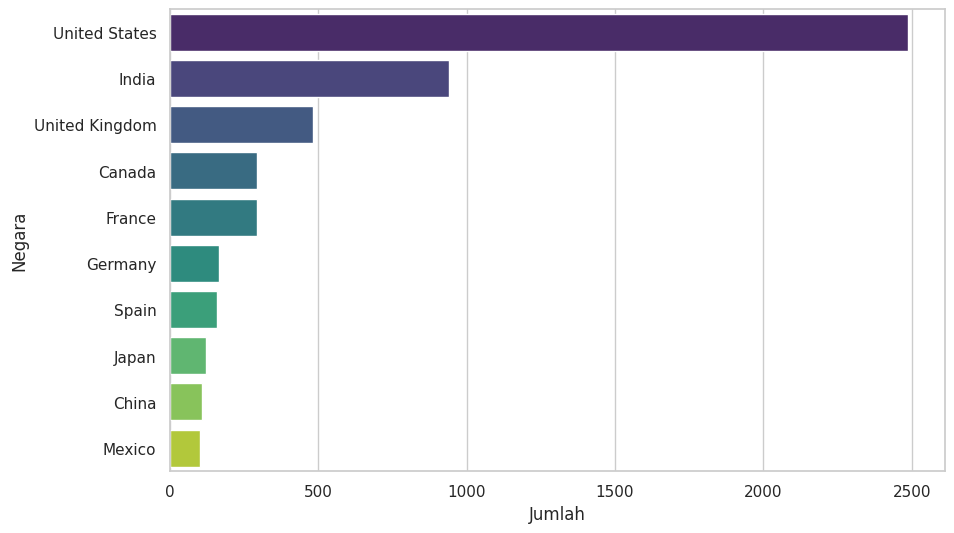

In [ ]:
sns.barplot(data=df_countries, x='Jumlah', y='Negara', hue='Negara',T dodge=False, palette='viridis')